<a href="https://colab.research.google.com/github/fowardelcac/PBI/blob/main/Notebooks/Notebooks_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/fowardelcac/PBI.git

Cloning into 'PBI'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 29 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 233.38 KiB | 3.96 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gdp = pd.read_csv('/content/PBI/PBI_dataset/Originales/gdp_data.csv')
#gdp.value = gdp.value.apply(lambda x: '{:.2f}'.format(x))
gdp.head()

,country_name,country_code,year,value
0,Afghanistan,AFG,1960,537777811.1
1,Afghanistan,AFG,1961,548888895.6
2,Afghanistan,AFG,1962,546666677.8
3,Afghanistan,AFG,1963,751111191.1
4,Afghanistan,AFG,1964,800000044.4


In [5]:
gdp.describe()

,year,value
count,13365.000000,1.336500e+04
mean,1994.478563,1.207051e+12
std,17.459585,5.413230e+12
min,1960.000000,8.824746e+06
25%,1980.000000,2.523472e+09
50%,1996.000000,1.842778e+10
75%,2009.000000,2.240000e+11
max,2022.000000,1.010000e+14


In [6]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13365 entries, 0 to 13364
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  13365 non-null  object 
 1   country_code  13365 non-null  object 
 2   year          13365 non-null  int64  
 3   value         13365 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 417.8+ KB


Ver el primer año de cada pais

In [11]:
primer = gdp.groupby('country_name').max()
primer.sort_values(by = 'year', ascending=False)


,country_code,year,value
country_name,,,
Latin America & the Caribbean (IDA & IBRD countries),TLA,2022,6.220000e+12
Middle East & North Africa (IDA & IBRD countries),TMN,2022,1.750000e+12
Middle income,MIC,2022,3.820000e+13
Moldova,MDA,2022,1.442095e+10
Mongolia,MNG,2022,1.681088e+10
...,...,...,...
"Yemen, Rep.",YEM,2018,4.322859e+10
South Sudan,SSD,2015,1.842647e+10
"Venezuela, RB",VEN,2014,4.820000e+11


In [26]:
gdp = gdp[gdp['country_name'] != 'Middle income']
gdp

,country_name,country_code,year,value
0,Afghanistan,AFG,1960,5.377778e+08
1,Afghanistan,AFG,1961,5.488889e+08
2,Afghanistan,AFG,1962,5.466667e+08
3,Afghanistan,AFG,1963,7.511112e+08
4,Afghanistan,AFG,1964,8.000000e+08
...,...,...,...,...
13360,Zimbabwe,ZWE,2018,3.415607e+10
13361,Zimbabwe,ZWE,2019,2.183223e+10
13362,Zimbabwe,ZWE,2020,2.150970e+10
13363,Zimbabwe,ZWE,2021,2.837124e+10


# PBI MUNDIAL HISTORICO

In [29]:
mundial = gdp.groupby('year').sum(numeric_only='True')
mundial

,value
year,
1960,9.083183e+12
1961,9.437180e+12
1962,1.007027e+13
1963,1.085766e+13
1964,1.192585e+13
...,...
2018,6.847063e+14
2019,6.945962e+14
2020,6.735329e+14


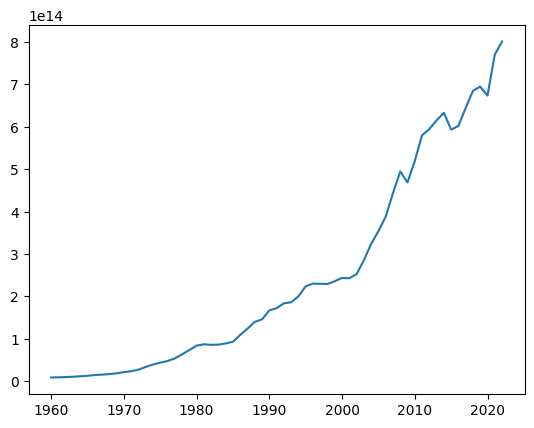

In [30]:
plt.plot(mundial)

Ver crecimiento por pais

In [42]:
def growth_per_country(country):
  df = gdp[gdp['country_name'] == country].set_index('year')
  plt.plot(df.index, df['value'])
  plt.xlabel('Años')
  plt.ylabel('Crecimiento')
  plt.title(f'Crecimiento en {country} a lo largo de los años')
  plt.show()

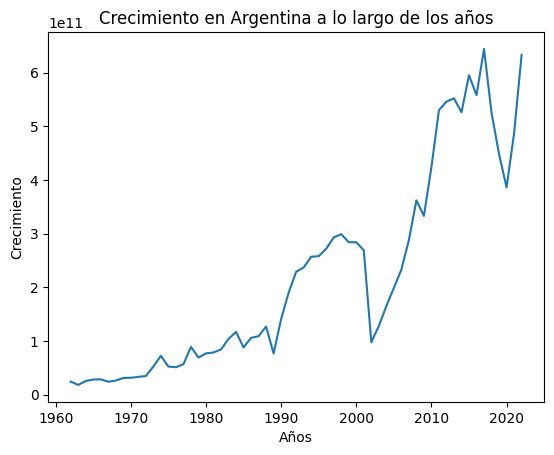

In [43]:
growth_per_country('Argentina')

In [44]:
# Países miembros del G20 en inglés
g20 = [
    'Argentina',
    'Australia',
    'Brazil',
    'Canada',
    'China',
    'France',
    'Germany',
    'India',
    'Indonesia',
    'Italy',
    'Japan',
    'Mexico',
    'Russia',
    'Saudi Arabia',
    'South Africa',
    'South Korea',
    'Turkey',
    'United Kingdom',
    'United States',
]

# Países miembros del G7 en inglés
g7 = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

# Países miembros del BRICS en inglés
brics = [
    'Brazil',
    'Russia',
    'India',
    'China',
    'South Africa',
]

In [84]:
brics_df = gdp[gdp['country_name'].isin(brics)].set_index('year')
g20_df = gdp[gdp['country_name'].isin(g20)].set_index('year')
g7_df = gdp[gdp['country_name'].isin(g7)].set_index('year')

Histograma/pie chart sobre el tamaño del pbi segun el grupo

In [88]:
current_yb = brics_df[brics_df.index == 2022]
current_y2 = g20_df[g20_df.index == 2022]
current_y7 = g7_df[g7_df.index == 2022]

In [89]:
current_y7

,country_name,country_code,value
year,,,
2022,Canada,CAN,2.140000e+12
2022,France,FRA,2.780000e+12
2022,Germany,DEU,4.070000e+12
2022,Italy,ITA,2.010000e+12
2022,Japan,JPN,4.230000e+12
2022,United Kingdom,GBR,3.070000e+12
2022,United States,USA,2.550000e+13


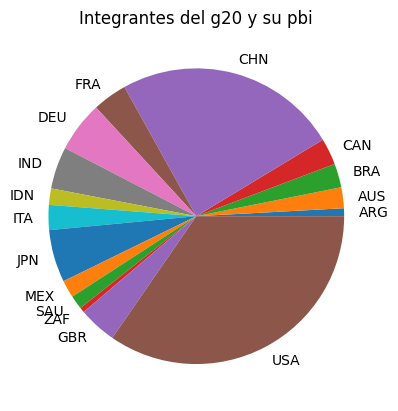

In [96]:
plt.pie(current_y2.value, labels = current_y2.country_code)
plt.title('Integrantes del g20 y su pbi')
plt.show()

organizar por continentes -> y comparar pbis entre continentes

In [102]:
gdp

,country_name,country_code,year,value
0,Afghanistan,AFG,1960,5.377778e+08
1,Afghanistan,AFG,1961,5.488889e+08
2,Afghanistan,AFG,1962,5.466667e+08
3,Afghanistan,AFG,1963,7.511112e+08
4,Afghanistan,AFG,1964,8.000000e+08
...,...,...,...,...
13360,Zimbabwe,ZWE,2018,3.415607e+10
13361,Zimbabwe,ZWE,2019,2.183223e+10
13362,Zimbabwe,ZWE,2020,2.150970e+10
13363,Zimbabwe,ZWE,2021,2.837124e+10


In [107]:
df = gdp.copy()
df['year'] = pd.to_numeric(df['year'])
result = df.groupby('country_name')['year'].max()
most_recent_values = df[df.set_index(['country_name', 'year']).index.isin(result.items())]

In [108]:
most_recent_values

,country_name,country_code,year,value
41,Afghanistan,AFG,2021,1.458314e+10
104,Africa Eastern and Southern,AFE,2022,1.170000e+12
167,Africa Western and Central,AFW,2022,8.780000e+11
206,Albania,ALB,2022,1.888210e+10
269,Algeria,DZA,2022,1.920000e+11
...,...,...,...,...
13146,West Bank and Gaza,PSE,2022,1.911190e+10
13209,World,WLD,2022,1.010000e+14
13238,"Yemen, Rep.",YEM,2018,2.160616e+10
13301,Zambia,ZMB,2022,2.978445e+10


In [109]:
df2 = pd.read_csv('/content/PBI/PBI_dataset/Originales/country_codes.csv')
df2

,country_code,region,income_group
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income
...,...,...,...
212,XKX,Europe & Central Asia,Upper middle income
213,YEM,Middle East & North Africa,Low income
214,ZAF,Sub-Saharan Africa,Upper middle income
215,ZMB,Sub-Saharan Africa,Lower middle income


In [110]:
resultado = pd.merge(most_recent_values, df2, on='country_code', how='inner')
resultado

,country_name,country_code,year,value,region,income_group
0,Afghanistan,AFG,2021,1.458314e+10,South Asia,Low income
1,Albania,ALB,2022,1.888210e+10,Europe & Central Asia,Upper middle income
2,Algeria,DZA,2022,1.920000e+11,Middle East & North Africa,Lower middle income
3,American Samoa,ASM,2021,7.090000e+08,East Asia & Pacific,High income
4,Andorra,AND,2022,3.352033e+09,Europe & Central Asia,High income
...,...,...,...,...,...,...
209,Virgin Islands (U.S.),VIR,2020,4.204000e+09,Latin America & Caribbean,High income
210,West Bank and Gaza,PSE,2022,1.911190e+10,Middle East & North Africa,Upper middle income
211,"Yemen, Rep.",YEM,2018,2.160616e+10,Middle East & North Africa,Low income
212,Zambia,ZMB,2022,2.978445e+10,Sub-Saharan Africa,Lower middle income


<Axes: >

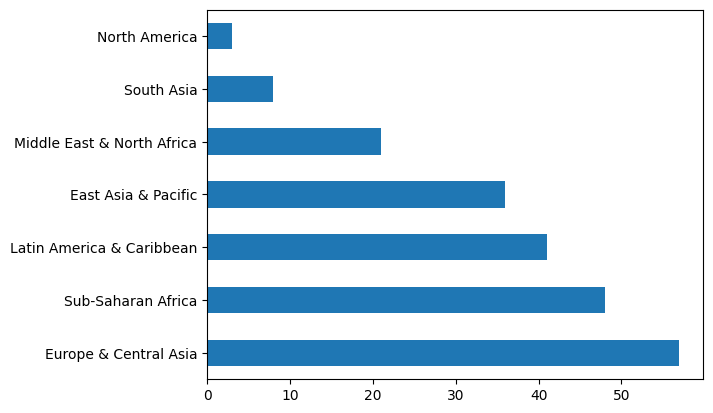

In [111]:
resultado['region'].value_counts().plot(kind='barh')

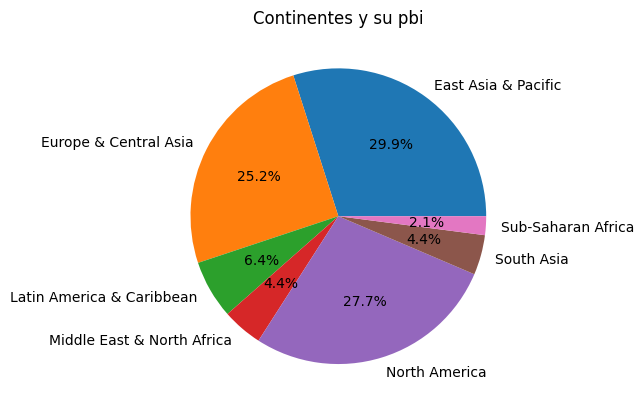

In [120]:
suma_group = resultado.groupby('region')['value'].sum().to_frame().reset_index()
plt.pie(suma_group.value, labels = suma_group.region, autopct='%1.1f%%')
plt.title('Continentes y su pbi')
plt.show()

¿COmo vario con los años el pbi por region? ¿cual es la region con mas crecimiento?


In [131]:
df = gdp.copy()
dff = pd.merge(df, df2, on='country_code', how='inner').set_index('year')
dff

,country_name,country_code,value,region,income_group
year,,,,,
1960,Afghanistan,AFG,5.377778e+08,South Asia,Low income
1961,Afghanistan,AFG,5.488889e+08,South Asia,Low income
1962,Afghanistan,AFG,5.466667e+08,South Asia,Low income
1963,Afghanistan,AFG,7.511112e+08,South Asia,Low income
1964,Afghanistan,AFG,8.000000e+08,South Asia,Low income
...,...,...,...,...,...
2018,Zimbabwe,ZWE,3.415607e+10,Sub-Saharan Africa,Lower middle income
2019,Zimbabwe,ZWE,2.183223e+10,Sub-Saharan Africa,Lower middle income
2020,Zimbabwe,ZWE,2.150970e+10,Sub-Saharan Africa,Lower middle income


In [155]:
d = dff.reset_index()
data = d.groupby(['region', 'value'])['year'].sum()
data = pd.DataFrame(data).reset_index('value')

In [156]:
data.head()

,value,year
region,,
East Asia & Pacific,8.824746e+06,1990
East Asia & Pacific,9.365488e+06,1991
East Asia & Pacific,9.631025e+06,1993
East Asia & Pacific,9.742604e+06,1992
East Asia & Pacific,1.088722e+07,1994


In [159]:
plt.plot(data.year, data.value, data = data['East Asia & Pacific'])

KeyError: ignored